In [1]:
from pathlib import Path

import numpy as np
import pandas
from Bio import SeqIO
from matplotlib import pyplot
import seaborn


def get_hie(seq_index):
    hie = {}
    for name in seq_index:
        record = seq_index[name]
        sf = '.'.join(record.description.split()[1].split('.')[:3])
        hie.setdefault(sf, [])
        hie[sf].append(record)
    return hie


scop95_idx = SeqIO.index('data/scop/astral-scopedom-seqres-gd-sel-gs-bib-95-2.07.fa', 'fasta')
scop95_hie = get_hie(scop95_idx)
scop100_idx = SeqIO.index('data/scop/astral-scopedom-seqres-gd-all-2.07-stable.fa', 'fasta')
scop100_hie = get_hie(scop100_idx)
deltablast_d = np.load('data/delta_scop95.npy', allow_pickle=True).item()
test_data = get_hie(SeqIO.index('evaluation.fasta', 'fasta'))
candidates = pandas.read_csv('data/new_hits.csv')

In [2]:
from pathlib import Path
from tqdm.auto import tqdm
import pandas
from agora import TMalignCommandLine

new_hit_tmscore_d = {'Aligner': [], 'Query': [], 'Template': [], 'TM-score': [], 'PDB': []}

for r in tqdm(candidates.itertuples(), total=candidates.shape[0]):
    for pdb in list(Path('data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local_i_local_p5p5p20/').glob(f'{r.Query}_*.pdb')):
        template = [_ for _ in pdb.read_text().splitlines() if _.startswith('REMARK') and 'TEMPLATE:' in _][0].split()[3]
        if template in r.new_hit:
            tmalign = TMalignCommandLine(f'data/evaluation/targets/{r.Query}.ent', pdb.as_posix())
            tmalign.run()
            if tmalign.tmscore is not None:
                new_hit_tmscore_d['Aligner'].append('Proposed')
                new_hit_tmscore_d['Query'].append(r.Query)
                new_hit_tmscore_d['Template'].append(template)
                new_hit_tmscore_d['TM-score'].append(tmalign.tmscore[0])
                new_hit_tmscore_d['PDB'].append(pdb.stem)

    for pdb in list(Path('data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local/').glob(f'{r.Query}_*.pdb')):
        template = [_ for _ in pdb.read_text().splitlines() if _.startswith('REMARK') and 'TEMPLATE:' in _][0].split()[3]
        if template in r.new_hit:
            tmalign = TMalignCommandLine(f'data/evaluation/targets/{r.Query}.ent', pdb.as_posix())
            tmalign.run()
            if tmalign.tmscore is not None:
                new_hit_tmscore_d['Aligner'].append('Baseline')
                new_hit_tmscore_d['Query'].append(r.Query)
                new_hit_tmscore_d['Template'].append(template)
                new_hit_tmscore_d['TM-score'].append(tmalign.tmscore[0])
                new_hit_tmscore_d['PDB'].append(pdb.stem)

    for pdb in list(Path('data/evaluation/delta_new_hits/').glob(f'{r.Query}_*.pdb')):
        template = [_ for _ in pdb.read_text().splitlines() if _.startswith('REMARK') and 'TEMPLATE:' in _][0].split()[3]
        if template in r.new_hit:
            tmalign = TMalignCommandLine(f'data/evaluation/targets/{r.Query}.ent', pdb.as_posix())
            tmalign.run()
            if tmalign.tmscore is not None:
                new_hit_tmscore_d['Aligner'].append('DELTA')
                new_hit_tmscore_d['Query'].append(r.Query)
                new_hit_tmscore_d['Template'].append(template)
                new_hit_tmscore_d['TM-score'].append(tmalign.tmscore[0])
                new_hit_tmscore_d['PDB'].append(pdb.stem)

    for pdb in list(Path('data/evaluation/delta_new_hits_thresh1/').glob(f'{r.Query}_*.pdb')):
        template = [_ for _ in pdb.read_text().splitlines() if _.startswith('REMARK') and 'TEMPLATE:' in _][0].split()[3]
        if template in r.new_hit:
            tmalign = TMalignCommandLine(f'data/evaluation/targets/{r.Query}.ent', pdb.as_posix())
            tmalign.run()
            if tmalign.tmscore is not None:
                new_hit_tmscore_d['Aligner'].append('DELTA_thresh1')
                new_hit_tmscore_d['Query'].append(r.Query)
                new_hit_tmscore_d['Template'].append(template)
                new_hit_tmscore_d['TM-score'].append(tmalign.tmscore[0])
                new_hit_tmscore_d['PDB'].append(pdb.stem)

    for pdb in list(Path('data/evaluation/delta_new_hits_word2/').glob(f'{r.Query}_*.pdb')):
        template = [_ for _ in pdb.read_text().splitlines() if _.startswith('REMARK') and 'TEMPLATE:' in _][0].split()[3]
        if template in r.new_hit:
            tmalign = TMalignCommandLine(f'data/evaluation/targets/{r.Query}.ent', pdb.as_posix())
            tmalign.run()
            if tmalign.tmscore is not None:
                new_hit_tmscore_d['Aligner'].append('DELTA_word2')
                new_hit_tmscore_d['Query'].append(r.Query)
                new_hit_tmscore_d['Template'].append(template)
                new_hit_tmscore_d['TM-score'].append(tmalign.tmscore[0])
                new_hit_tmscore_d['PDB'].append(pdb.stem)

    for pdb in list(Path('data/evaluation/delta_new_hits_word2_thresh1/').glob(f'{r.Query}_*.pdb')):
        template = [_ for _ in pdb.read_text().splitlines() if _.startswith('REMARK') and 'TEMPLATE:' in _][0].split()[3]
        if template in r.new_hit:
            tmalign = TMalignCommandLine(f'data/evaluation/targets/{r.Query}.ent', pdb.as_posix())
            tmalign.run()
            if tmalign.tmscore is not None:
                new_hit_tmscore_d['Aligner'].append('DELTA_word2_thresh1')
                new_hit_tmscore_d['Query'].append(r.Query)
                new_hit_tmscore_d['Template'].append(template)
                new_hit_tmscore_d['TM-score'].append(tmalign.tmscore[0])
                new_hit_tmscore_d['PDB'].append(pdb.stem)

    for pdb in list(Path('data/evaluation/delta_new_hits_thresh1_xdug30_xdg30_xdgf30/').glob(f'{r.Query}_*.pdb')):
        template = [_ for _ in pdb.read_text().splitlines() if _.startswith('REMARK') and 'TEMPLATE:' in _][0].split()[3]
        if template in r.new_hit:
            tmalign = TMalignCommandLine(f'data/evaluation/targets/{r.Query}.ent', pdb.as_posix())
            tmalign.run()
            if tmalign.tmscore is not None:
                new_hit_tmscore_d['Aligner'].append('DELTA_thresh1_xdug30_xdg30_xdgf30')
                new_hit_tmscore_d['Query'].append(r.Query)
                new_hit_tmscore_d['Template'].append(template)
                new_hit_tmscore_d['TM-score'].append(tmalign.tmscore[0])
                new_hit_tmscore_d['PDB'].append(pdb.stem)

    for pdb in list(Path('data/evaluation/delta_new_hits_thresh1_xdug20_xdg20_xdgf20/').glob(f'{r.Query}_*.pdb')):
        template = [_ for _ in pdb.read_text().splitlines() if _.startswith('REMARK') and 'TEMPLATE:' in _][0].split()[3]
        if template in r.new_hit:
            tmalign = TMalignCommandLine(f'data/evaluation/targets/{r.Query}.ent', pdb.as_posix())
            tmalign.run()
            if tmalign.tmscore is not None:
                new_hit_tmscore_d['Aligner'].append('DELTA_thresh1_xdug20_xdg20_xdgf20')
                new_hit_tmscore_d['Query'].append(r.Query)
                new_hit_tmscore_d['Template'].append(template)
                new_hit_tmscore_d['TM-score'].append(tmalign.tmscore[0])
                new_hit_tmscore_d['PDB'].append(pdb.stem)

    for pdb in list(Path('data/evaluation/delta_new_hits_thresh10_xdug10_xdg10_xdgf10/').glob(f'{r.Query}_*.pdb')):
        template = [_ for _ in pdb.read_text().splitlines() if _.startswith('REMARK') and 'TEMPLATE:' in _][0].split()[3]
        if template in r.new_hit:
            tmalign = TMalignCommandLine(f'data/evaluation/targets/{r.Query}.ent', pdb.as_posix())
            tmalign.run()
            if tmalign.tmscore is not None:
                new_hit_tmscore_d['Aligner'].append('DELTA_thresh10_xdug10_xdg10_xdgf10')
                new_hit_tmscore_d['Query'].append(r.Query)
                new_hit_tmscore_d['Template'].append(template)
                new_hit_tmscore_d['TM-score'].append(tmalign.tmscore[0])
                new_hit_tmscore_d['PDB'].append(pdb.stem)

    for pdb in list(Path('data/evaluation/delta_new_hits_word2_thresh1_xdug10_xdg10_xdgf10/').glob(f'{r.Query}_*.pdb')):
        template = [_ for _ in pdb.read_text().splitlines() if _.startswith('REMARK') and 'TEMPLATE:' in _][0].split()[3]
        if template in r.new_hit:
            tmalign = TMalignCommandLine(f'data/evaluation/targets/{r.Query}.ent', pdb.as_posix())
            tmalign.run()
            if tmalign.tmscore is not None:
                new_hit_tmscore_d['Aligner'].append('DELTA_word2_thresh1_xdug10_xdg10_xdgf10')
                new_hit_tmscore_d['Query'].append(r.Query)
                new_hit_tmscore_d['Template'].append(template)
                new_hit_tmscore_d['TM-score'].append(tmalign.tmscore[0])
                new_hit_tmscore_d['PDB'].append(pdb.stem)


    for pdb in list(Path('data/evaluation/delta_new_hits_word2_thresh1_xdug20_xdg20_xdgf20/').glob(f'{r.Query}_*.pdb')):
        template = [_ for _ in pdb.read_text().splitlines() if _.startswith('REMARK') and 'TEMPLATE:' in _][0].split()[3]
        if template in r.new_hit:
            tmalign = TMalignCommandLine(f'data/evaluation/targets/{r.Query}.ent', pdb.as_posix())
            tmalign.run()
            if tmalign.tmscore is not None:
                new_hit_tmscore_d['Aligner'].append('DELTA_word2_thresh1_xdug20_xdg20_xdgf20')
                new_hit_tmscore_d['Query'].append(r.Query)
                new_hit_tmscore_d['Template'].append(template)
                new_hit_tmscore_d['TM-score'].append(tmalign.tmscore[0])
                new_hit_tmscore_d['PDB'].append(pdb.stem)

    for pdb in list(Path('data/evaluation/delta_new_hits_word2_thresh1_xdug30_xdg30_xdgf30/').glob(f'{r.Query}_*.pdb')):
        template = [_ for _ in pdb.read_text().splitlines() if _.startswith('REMARK') and 'TEMPLATE:' in _][0].split()[3]
        if template in r.new_hit:
            tmalign = TMalignCommandLine(f'data/evaluation/targets/{r.Query}.ent', pdb.as_posix())
            tmalign.run()
            if tmalign.tmscore is not None:
                new_hit_tmscore_d['Aligner'].append('DELTA_word2_thresh1_xdug30_xdg30_xdgf30')
                new_hit_tmscore_d['Query'].append(r.Query)
                new_hit_tmscore_d['Template'].append(template)
                new_hit_tmscore_d['TM-score'].append(tmalign.tmscore[0])
                new_hit_tmscore_d['PDB'].append(pdb.stem)


new_hit_tmscore_df = pandas.DataFrame.from_dict(new_hit_tmscore_d)
new_hit_tmscore_df

,Aligner,Query,Template,TM-score,PDB
0,Proposed,d2oi8a1,d1d5ya1,0.43479,d2oi8a1_60
1,Proposed,d2oi8a1,d1bl0a1,0.47732,d2oi8a1_61
2,Proposed,d2oi8a1,d1hlva1,0.36777,d2oi8a1_72
3,Proposed,d2oi8a1,d1bw6a_,0.42771,d2oi8a1_75
4,Proposed,d2oi8a1,d1lfup_,0.41631,d2oi8a1_93
...,...,...,...,...,...
3259,DELTA_word2_thresh1_xdug30_xdg30_xdgf30,d2c42a1,d2bfdb1,0.03038,d2c42a1_d2bfdb1
3260,DELTA_word2_thresh1_xdug30_xdg30_xdgf30,d2c42a1,d2ji7a2,0.27186,d2c42a1_d2ji7a2
3261,DELTA_word2_thresh1_xdug30_xdg30_xdgf30,d2c42a1,d2ji7a3,0.03106,d2c42a1_d2ji7a3
3262,DELTA_word2_thresh1_xdug30_xdg30_xdgf30,d2c42a1,d2r5na1,0.10455,d2c42a1_d2r5na1


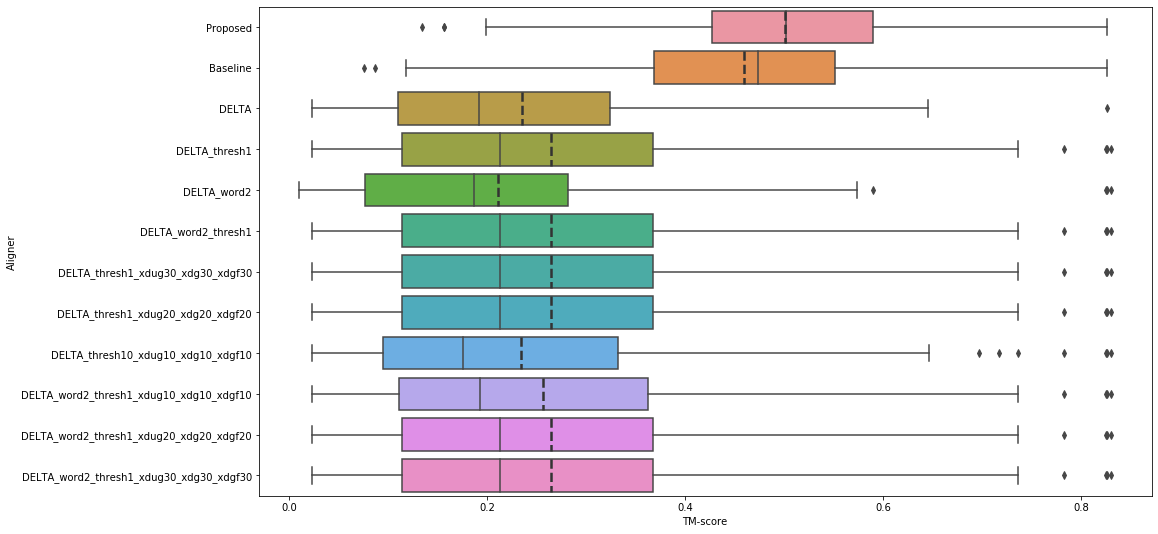

In [3]:
%matplotlib inline
import seaborn
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(16, 9))
seaborn.boxplot(x='TM-score', y='Aligner',
                data=new_hit_tmscore_df,
                ax=ax, showmeans=True, meanline=True, meanprops={'color': '#333333', 'linewidth': 2.5})

/home/makigaki/.local/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


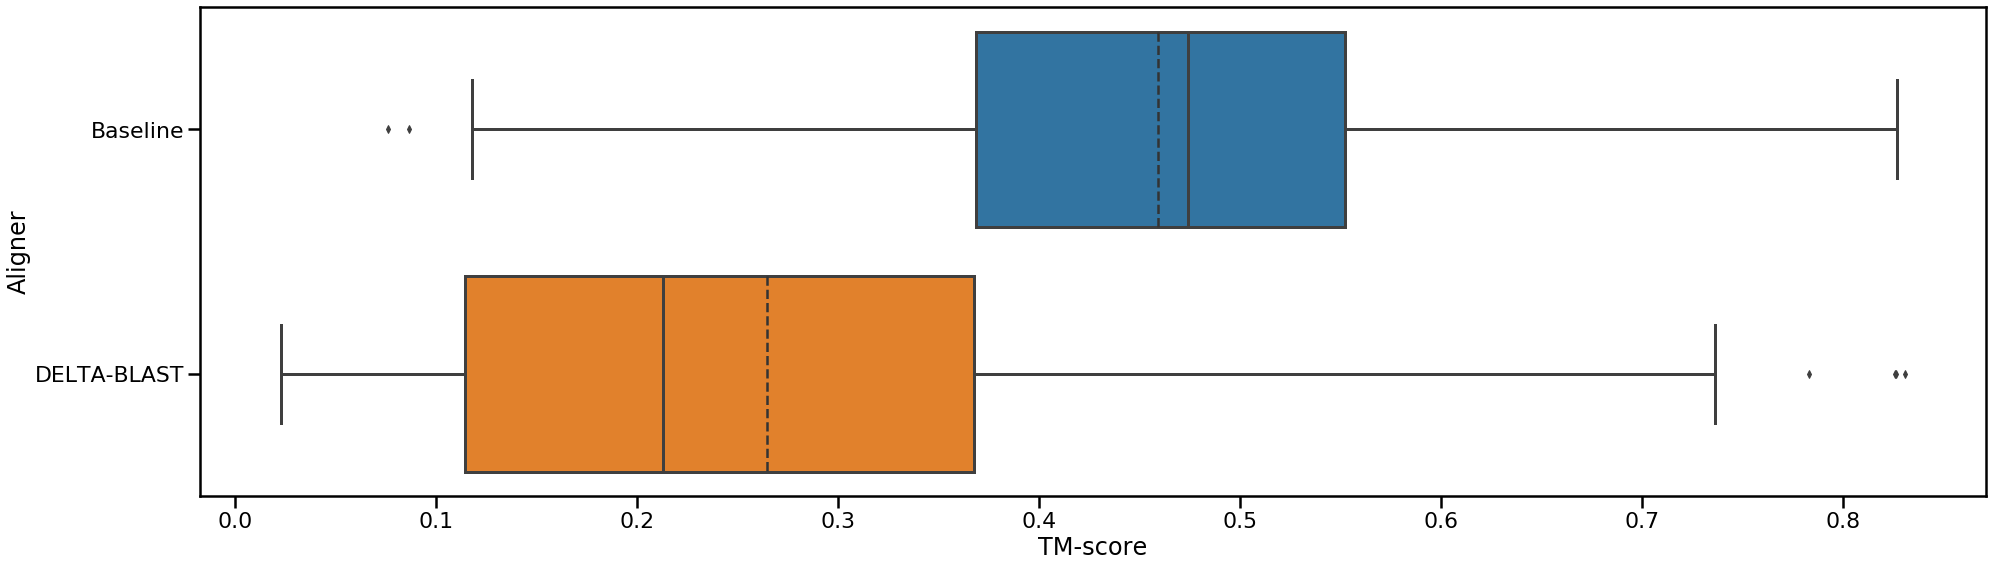

In [4]:
%matplotlib inline
import seaborn
from matplotlib import pyplot

diff_delta = new_hit_tmscore_df[(new_hit_tmscore_df['Aligner'] == 'Baseline') | (new_hit_tmscore_df['Aligner'] == 'DELTA_thresh1')]
diff_delta.loc[diff_delta['Aligner'] == 'DELTA_thresh1', 'Aligner'] = 'DELTA-BLAST'

seaborn.set_context('poster')
fig, ax = pyplot.subplots(figsize=(32, 9))
seaborn.boxplot(x='TM-score', y='Aligner', data=diff_delta,
                ax=ax, showmeans=True, meanline=True, meanprops={'color': '#333333', 'linewidth': 2.5})
fig.savefig('img/hard_tm_delta.pdf', bbox_inches='tight', pad_inches=0)

In [14]:
sw = new_hit_tmscore_df[new_hit_tmscore_df['Aligner'] == 'Baseline']
isw = new_hit_tmscore_df[new_hit_tmscore_df['Aligner'] == 'Proposed']
merged_df = pandas.merge(sw, isw, on='PDB')
merged_df['diff'] = merged_df['TM-score_y'] - merged_df['TM-score_x']
merged_df['Query'] = merged_df['PDB'].apply(lambda _: _[:7])
merged_df['Rank'] = merged_df['PDB'].apply(lambda _: int(_.split('_')[-1]))
merged_df = merged_df.sort_values('diff')
merged_df

,Aligner_x,Query_x,Template_x,TM-score_x,PDB,Aligner_y,Query_y,Template_y,TM-score_y,diff,Query,Rank
173,Baseline,d2pcsa1,d5i8fa1,0.55775,d2pcsa1_51,Proposed,d2pcsa1,d5i8fa1,0.49845,-0.05930,d2pcsa1,51
2,Baseline,d2oi8a1,d1hlva1,0.38764,d2oi8a1_72,Proposed,d2oi8a1,d1hlva1,0.36777,-0.01987,d2oi8a1,72
165,Baseline,d2pcsa1,d4a8ua_,0.52712,d2pcsa1_33,Proposed,d2pcsa1,d4a8ua_,0.51210,-0.01502,d2pcsa1,33
162,Baseline,d2pcsa1,d1fm4a_,0.52898,d2pcsa1_27,Proposed,d2pcsa1,d1fm4a_,0.51771,-0.01127,d2pcsa1,27
211,Baseline,d4pc3c1,d1dv0a_,0.37061,d4pc3c1_42,Proposed,d4pc3c1,d1dv0a_,0.37061,0.00000,d4pc3c1,42
...,...,...,...,...,...,...,...,...,...,...,...,...
61,Baseline,d4a0yb_,d1vh5a1,0.40553,d4a0yb__27,Proposed,d4a0yb_,d1vh5a1,0.77017,0.36464,d4a0yb_,27
171,Baseline,d2pcsa1,d3ijta1,0.18937,d2pcsa1_44,Proposed,d2pcsa1,d3ijta1,0.59695,0.40758,d2pcsa1,44
67,Baseline,d4a0yb_,d3q62a1,0.13145,d4a0yb__14,Proposed,d4a0yb_,d3q62a1,0.66140,0.52995,d4a0yb_,14
56,Baseline,d4a0yb_,d3r87a_,0.12813,d4a0yb__100,Proposed,d4a0yb_,d3r87a_,0.66484,0.53671,d4a0yb_,100


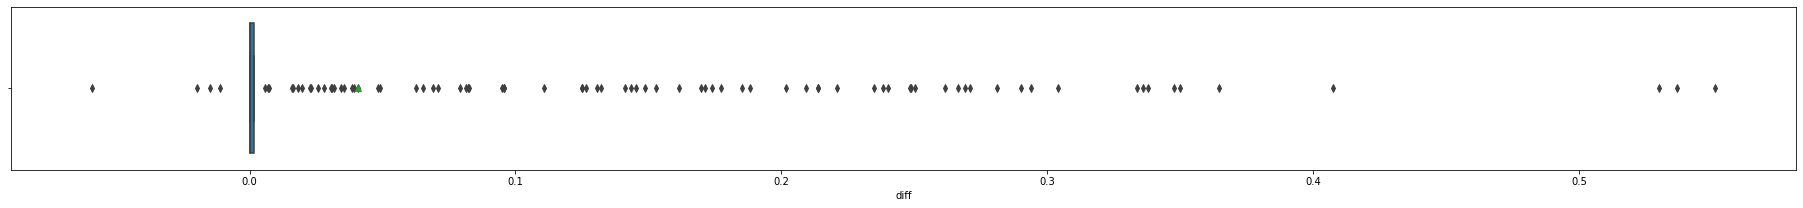

In [5]:
fig, ax = pyplot.subplots(figsize=(32, 3))
seaborn.boxplot(merged_df['diff'], showmeans=True)

In [5]:
bads = merged_df[merged_df['diff'] < 0]
bads

,Aligner_x,Query_x,Template_x,TM-score_x,PDB,Aligner_y,Query_y,Template_y,TM-score_y,diff,Query,Rank
173,Local,d2pcsa1,d5i8fa1,0.55775,d2pcsa1_51,Local+iLocal\n(5->5->20),d2pcsa1,d5i8fa1,0.49845,-0.05930,d2pcsa1,51
2,Local,d2oi8a1,d1hlva1,0.38764,d2oi8a1_72,Local+iLocal\n(5->5->20),d2oi8a1,d1hlva1,0.36777,-0.01987,d2oi8a1,72
165,Local,d2pcsa1,d4a8ua_,0.52712,d2pcsa1_33,Local+iLocal\n(5->5->20),d2pcsa1,d4a8ua_,0.51210,-0.01502,d2pcsa1,33
162,Local,d2pcsa1,d1fm4a_,0.52898,d2pcsa1_27,Local+iLocal\n(5->5->20),d2pcsa1,d1fm4a_,0.51771,-0.01127,d2pcsa1,27


In [28]:
from io import StringIO
from pathlib import Path
import numpy as np
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment
from Bio.Alphabet import generic_protein

for i in bads.itertuples():
    display(i)
    results = np.load(Path(f'data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local_i_local_p5p5p20/{i.Query_x}.npy'), allow_pickle=True)
    result = results[i.Rank-1]
    aln = AlignIO.read(StringIO(result[7][0]), format='clustal')
    print(aln.format('clustal'))
    results = np.load(Path(f'data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local/{i.Query_x}.npy'), allow_pickle=True)
    result = results[i.Rank-1]
    aln = AlignIO.read(StringIO(result[7][0]), format='clustal')
    print(aln.format('clustal'))
    break

Pandas(Index=173, Aligner_x='Local', Query_x='d2pcsa1', Template_x='d5i8fa1', _4=0.55775, PDB='d2pcsa1_51', Aligner_y='Local+iLocal\n(5->5->20)', Query_y='d2pcsa1', Template_y='d5i8fa1', _9=0.49845, diff=-0.059299999999999964, Query='d2pcsa1', Rank=51)

CLUSTAL X (1.81) multiple sequence alignment


d2pcsa1                             --------------------------NGNGSIELKGTVEEVWSKLMDPSI
UniRef50_A0A2V8                     -------------------------MKIEGTHELRAPRERVWQALVDPSV
UniRef50_A0A2V8                     ---------------------------IEGTHELRAPRERVWQALVDPSV
UniRef50_A0A3D1                     ---------------------------QNGQCEIAAPRDLVWSALQNPDV
UniRef50_A0A3D1                     ---------------------------QNGQCEIAAPRDLVWSALQNPDV
d5i8fa1                             MAAYTIVKEEESPIAPHRLFKALVLERHQVLVKAQPHVFKSGEIIEGDGG
                                                                :   :         . : . . 

d2pcsa1                             LSKCIMGCKSLELIGEDKYKADLQIGIAAVKGKYDAIIEVTDIKPPYHYK
UniRef50_A0A2V8                     LQRCIPGCERLERTGEDSYAATLRTGVGAIKGVFQGSVRLEDMSAPTHYR
UniRef50_A0A2V8                     LQRCIPGCERLERTGEDSYAATLRTGVGAIKGVFQGSVRLEDMSAPTHYR
UniRef50_A0A3D1                     LAASIPGCKSMRRIDATHYLASVQTKVGPVSASFEVQIDLQDIDPP

In [6]:
goods = merged_df[merged_df['diff'] > 0.1]
goods

,Aligner_x,Query_x,Template_x,TM-score_x,PDB,Aligner_y,Query_y,Template_y,TM-score_y,diff,Query,Rank
201,Local,d4pc3c1,d5xbob_,0.41242,d4pc3c1_16,Local+iLocal\n(5->5->20),d4pc3c1,d5xbob_,0.52327,0.11085,d4pc3c1,16
150,Local,d1w9aa_,d3cb0a_,0.22496,d1w9aa__40,Local+iLocal\n(5->5->20),d1w9aa_,d3cb0a_,0.34984,0.12488,d1w9aa_,40
28,Local,d1k8rb_,d4ny0a1,0.33787,d1k8rb__30,Local+iLocal\n(5->5->20),d1k8rb_,d4ny0a1,0.46304,0.12517,d1k8rb_,30
7,Local,d1j1ta_,d4ipma1,0.07591,d1j1ta__35,Local+iLocal\n(5->5->20),d1j1ta_,d4ipma1,0.20243,0.12652,d1j1ta_,35
41,Local,d1k8rb_,d1rlfa_,0.22993,d1k8rb__6,Local+iLocal\n(5->5->20),d1k8rb_,d1rlfa_,0.36043,0.13050,d1k8rb_,6
169,Local,d2pcsa1,d3rwsa1,0.56187,d2pcsa1_39,Local+iLocal\n(5->5->20),d2pcsa1,d3rwsa1,0.69399,0.13212,d2pcsa1,39
203,Local,d4pc3c1,d1qzea1,0.50428,d4pc3c1_20,Local+iLocal\n(5->5->20),d4pc3c1,d1qzea1,0.64559,0.14131,d4pc3c1,20
149,Local,d1w9aa_,d2ecua_,0.30687,d1w9aa__38,Local+iLocal\n(5->5->20),d1w9aa_,d2ecua_,0.45045,0.14358,d1w9aa_,38
117,Local,d2ux6a_,d1sdda1,0.24171,d2ux6a__90,Local+iLocal\n(5->5->20),d2ux6a_,d1sdda1,0.38716,0.14545,d2ux6a_,90
29,Local,d1k8rb_,d3zo5b1,0.32634,d1k8rb__31,Local+iLocal\n(5->5->20),d1k8rb_,d3zo5b1,0.47522,0.14888,d1k8rb_,31


In [26]:
from io import StringIO
from pathlib import Path
import numpy as np
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment
from Bio.Alphabet import generic_protein

for i in goods.itertuples():
    if i.Index == 7:
        results = np.load(Path(f'data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local/{i.Query_x}.npy'), allow_pickle=True)
        result = results[i.Rank-1]
        print(result[7][0])
        print('#########')
        results = np.load(Path(f'data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local_i_local_p5p5p20/{i.Query_x}.npy'), allow_pickle=True)
        result = results[i.Rank-1]
        print(result[7][0])
        print('#########')

CLUSTAL X (1.81) multiple sequence alignment


d1j1ta_                             --------------------------------------------------
d4ipma1                             QAGTETEEYHLPLTWERDGSSVSASVVIDSNWRWTHSTEDTTNCYDGNEW

d1j1ta_                             --------------------------------------------------
d4ipma1                             DSTLCPDADTCTENCAIDGVDQGTWGDTYGITASGSKLTLSFVTEGEYST

d1j1ta_                             --------------------------------------------------
d4ipma1                             DIGSRVFLMADDDNYEIFNLLDKEFSFDVDASNLPCGLNGALYFVSMDED

d1j1ta_                             --------------------------------------------------
d4ipma1                             GGTSKYSTNTAGAKYGTGYCDAQCPHDMKFIAGKANSDGWTPSDNDQNAG

d1j1ta_                             --------------------------------------------------
d4ipma1                             TGEMGACCHEMDIWEANSQAQSYTAHVCSVDGYTPCTGTDCGDNGDDRYK

d1j1ta_                             ------------------------------------------

In [15]:
display(new_hit_tmscore_df[new_hit_tmscore_df['Aligner'] == 'Baseline'].describe())
display(new_hit_tmscore_df[new_hit_tmscore_df['Aligner'] == 'Proposed'].describe())

,TM-score
count,318.000000
mean,0.459302
std,0.144925
min,0.075910
25%,0.368523
50%,0.473990
75%,0.552065
max,0.826470


,TM-score
count,317.000000
mean,0.501190
std,0.126706
min,0.134370
25%,0.427710
50%,0.502460
75%,0.590490
max,0.826470


In [20]:
from scipy import stats
stats.ttest_rel(merged_df['TM-score_x'], merged_df['TM-score_y'])

Ttest_relResult(statistic=-7.505343146186368, pvalue=6.286265281919446e-13)

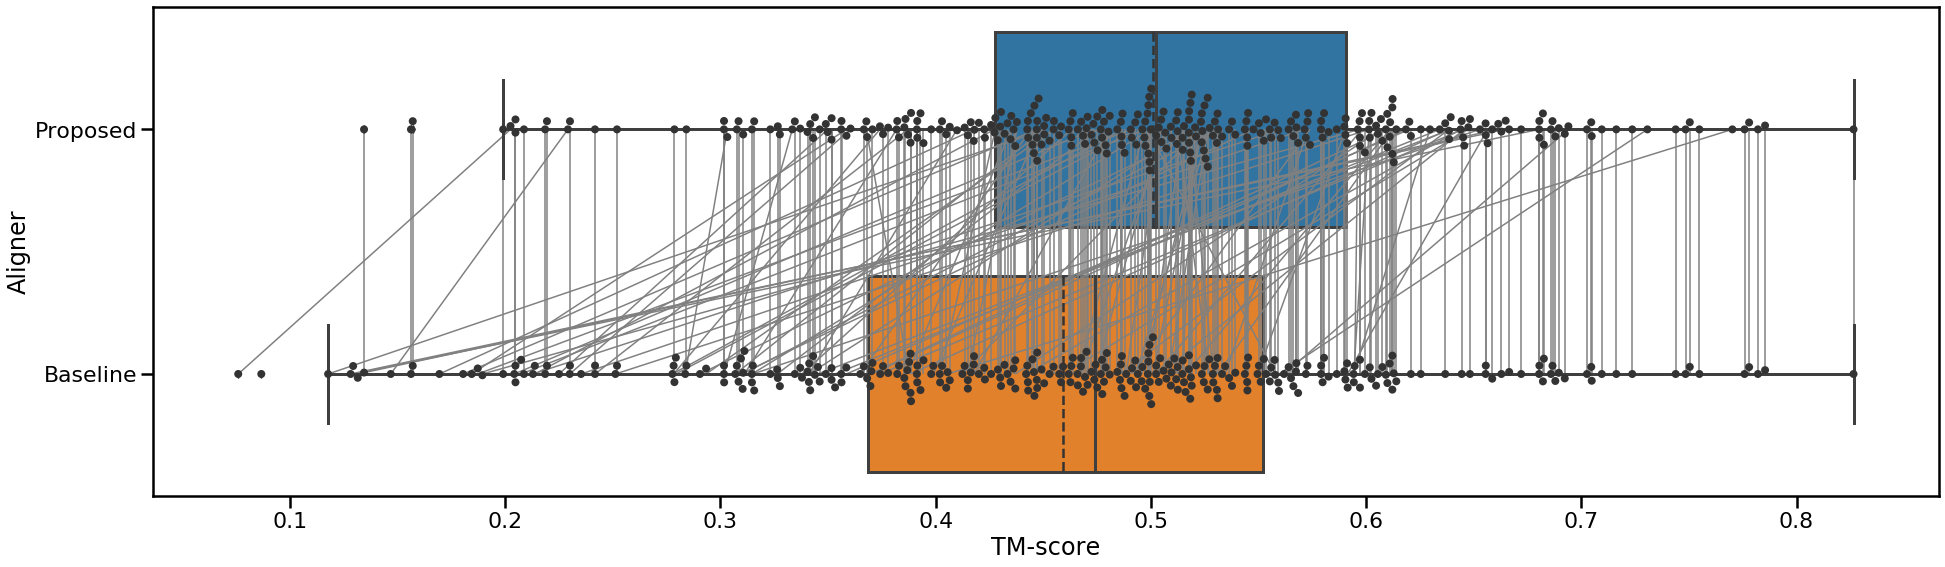

In [18]:
%matplotlib inline

from matplotlib import pyplot, collections
import seaborn

seaborn.set_context('poster')
fig, ax = pyplot.subplots(figsize=(32, 9))
seaborn.boxplot(x='TM-score', y='Aligner', data=new_hit_tmscore_df,
               showmeans=True, meanline=True, ax=ax, meanprops={'color': '#333333', 'linewidth': 2.5})
seaborn.swarmplot(x='TM-score', y='Aligner', data=new_hit_tmscore_df, color='0.2', size=8, ax=ax)
ax.add_collection(collections.LineCollection([[(_[1][3], 1), (_[1][8], 0)] for _ in merged_df.iterrows()], linewidths=1.5, colors='gray'))
fig.savefig('img/hard_tm.pdf', bbox_inches='tight', pad_inches=0)

In [5]:
import subprocess
from subprocess import PIPE
import tempfile
from io import StringIO
import pandas
from Bio.Blast.Applications import NcbideltablastCommandline
from Bio import SeqIO
from tqdm.auto import tqdm

pairs = {'Query': [], 'Hit': [], 'XML': []}
scop = SeqIO.index('data/scop/astral-scopedom-seqres-gd-all-2.07-stable.fa', 'fasta')

new_hits = pandas.read_csv('data/new_hits.csv')
for r in tqdm(new_hits.itertuples(), total=new_hits.shape[0]):
    with tempfile.TemporaryDirectory() as t:
        tmpdir = Path(t)
        SeqIO.write(scop[r.Query], tmpdir/'query.fasta', 'fasta')
        for subject in eval(r.new_hit):
            SeqIO.write(scop[subject], tmpdir/'subject.fasta', 'fasta')
            res, _ = NcbideltablastCommandline(query=(tmpdir/'query.fasta').as_posix(),
                                               subject=(tmpdir/'subject.fasta').as_posix(),
                                               #word_size=2,
                                               threshold=10,
                                               xdrop_ungap=10,
                                               xdrop_gap=10,
                                               xdrop_gap_final=10,
                                               outfmt=5, rpsdb='/data/DB/blastdb/cdd_delta')()
            pairs['Query'].append(r.Query)
            pairs['Hit'].append(subject)
            pairs['XML'].append(res)

pandas.DataFrame.from_dict(pairs).to_csv('data/delta_new_hits_thresh10_xdug10_xdg10_xdgf10.csv')